In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

# 0. 原始影像

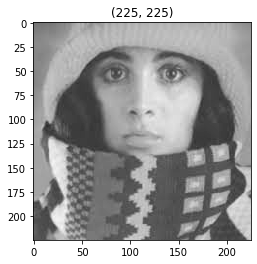

In [2]:
# 先將 lucy 轉灰階

img = cv2.imread('lucy_color.jpg', 1)

lucy = np.array(img, dtype=np.uint8)

lucyGray = cv2.cvtColor(lucy, cv2.COLOR_BGR2GRAY)

lucyGray = np.array(lucyGray, dtype=np.uint8)

plt.title(lucyGray.shape)
plt.imshow(lucyGray, cmap='gray', vmin=0, vmax=255)
plt.show()

# 定義 Gray Dilation 函式

In [3]:
# 手刻 Gray Dilation 函式 (2D)

def grayDilation2D(image, mask):
    m, n = mask.shape
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y,x))

    for i in range(y):
        for j in range(x):
            add = image[i:i+m, j:j+m] + mask  ## 加上 mask
            new_image[i][j] = np.amax(add.flatten()) ## filter 內選最大的

            if new_image[i][j] < 0:
                new_image[i][j] = 0

            if new_image[i][j] > 255:
                new_image[i][j] = 255

    result = np.array(new_image, dtype=np.uint8)

    # 最外圍沒算，所以補回來

    result = cv2.copyMakeBorder(result, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

    return result

# 定義 Gray Erosion 函式

In [4]:
# 手刻 Gray Erosion 函式 (2D)

def grayErosion2D(image, mask):
    m, n = mask.shape
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y,x))

    for i in range(y):
        for j in range(x):
            sub = image[i:i+m, j:j+m] - mask ## 減掉 mask
            new_image[i][j] = np.amin(sub.flatten()) ## filter 內選最小的

            if new_image[i][j] < 0:
                new_image[i][j] = 0

            if new_image[i][j] > 255:
                new_image[i][j] = 255

    result = np.array(new_image, dtype=np.uint8)

    # 最外圍沒算，所以補回來

    result = cv2.copyMakeBorder(result, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

    return result

# 1. Dilation 變亮，局部亮點 ; Erosion 變暗，局部暗點

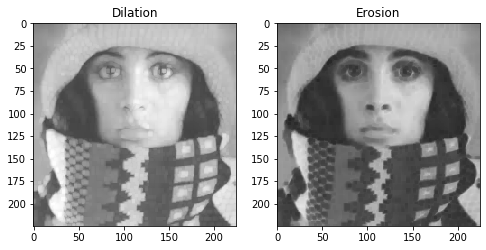

In [11]:
mask = np.array((
	[10, 10, 10],
	[10, 10, 10],
	[10, 10, 10]), dtype="int")

plt.figure(figsize=(8, 8))

img_Dilation = grayDilation2D(lucyGray, mask)
cv2.imwrite('lucy_Dilation.jpg', img_Dilation)

plt.subplot(1,2,1)
plt.title('Dilation')
plt.imshow(img_Dilation, cmap='gray', vmin=0, vmax=255)

img_Erosion = grayErosion2D(lucyGray, mask)
cv2.imwrite('lucy_Erosion.jpg', img_Erosion)

plt.subplot(1,2,2)
plt.title('Erosion')
plt.imshow(img_Erosion, cmap='gray', vmin=0, vmax=255)

plt.show()

# 2. Morphological Smoothing > Opening + Closing

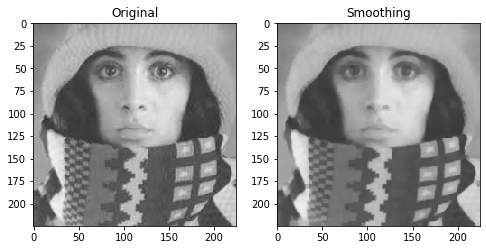

In [12]:
mask = np.array((
	[10, 10, 10],
	[10, 10, 10],
	[10, 10, 10]), dtype="int")

# 先做 Opening > 先 Erosion  在 Dilation > 拿掉小的亮的 detail

img_Opening = grayErosion2D(lucyGray, mask)

img_Opening = grayDilation2D(img_Opening, mask)

# 再做 Closing > 先 Dilation  在 Erosion > 拿掉小的暗的 detail

img_Closing = grayDilation2D(img_Opening, mask)

img_Smoothing = grayErosion2D(img_Closing, mask)
cv2.imwrite('lucy_Smoothing.jpg', img_Smoothing)

plt.figure(figsize=(8, 8))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(lucyGray, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Smoothing')
plt.imshow(img_Smoothing, cmap='gray', vmin=0, vmax=255)

plt.show()

# 3. Morphological Gradient > Dilation 減掉 Erosion

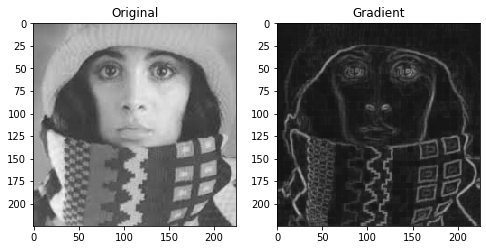

In [17]:
mask = np.array((
	[10, 10, 10],
	[10, 10, 10],
	[10, 10, 10]), dtype="int")

plt.figure(figsize=(8, 8))

img_Dilation = grayDilation2D(lucyGray, mask)
img_Erosion = grayErosion2D(lucyGray, mask)
img_Gradient = cv2.subtract(img_Dilation, img_Erosion)
cv2.imwrite('lucy_Gradient.jpg', img_Gradient)

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(lucyGray, cmap='gray', vmin=0, vmax=255)


plt.subplot(1,2,2)
plt.title('Gradient')
plt.imshow(img_Gradient, cmap='gray', vmin=0, vmax=255)

plt.show()

# 4. Top-hat transformation > 原始影像 - opening

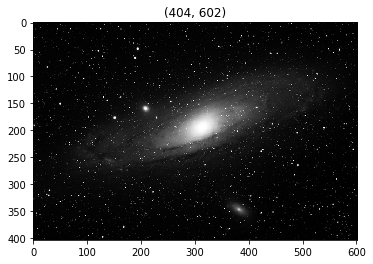

In [18]:
# 先將 rice 轉灰階

img = cv2.imread('star_color.png', 1)

star = np.array(img, dtype=np.uint8)

starGray = cv2.cvtColor(star, cv2.COLOR_BGR2GRAY)

starGray = np.array(starGray, dtype=np.uint8)

plt.title(starGray.shape)
plt.imshow(starGray, cmap='gray', vmin=0, vmax=255)
plt.show()

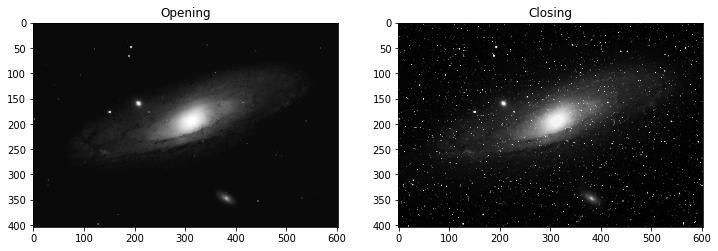

In [15]:
mask = np.array((
	[10, 10, 10],
	[10, 10, 10],
	[10, 10, 10]), dtype="int")

plt.figure(figsize=(12, 12))

img_Opening = grayErosion2D(starGray, mask)
img_Opening = grayDilation2D(img_Opening, mask)
cv2.imwrite('star_Opening.jpg', img_Opening)

plt.subplot(1,2,1)
plt.title('Opening')
plt.imshow(img_Opening, cmap='gray', vmin=0, vmax=255)

img_Closing = grayDilation2D(starGray, mask)
img_Closing = grayErosion2D(img_Closing, mask)
cv2.imwrite('star_Closing.jpg', img_Closing)

plt.subplot(1,2,2)
plt.title('Closing')
plt.imshow(img_Closing, cmap='gray', vmin=0, vmax=255)

plt.show()

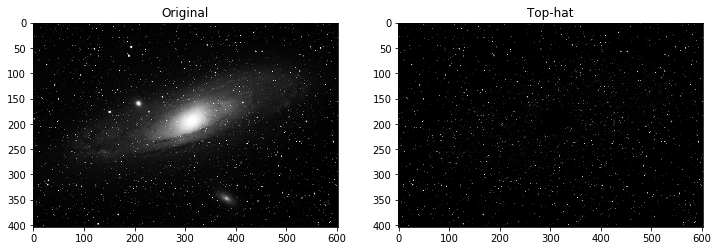

In [16]:
mask = np.array((
	[10, 10, 10],
	[10, 10, 10],
	[10, 10, 10]), dtype="int")

plt.figure(figsize=(12, 12))

img_Opening = grayErosion2D(starGray, mask)

img_Opening = grayDilation2D(img_Opening, mask)

img_TopHat = cv2.subtract(starGray, img_Opening)
cv2.imwrite('star_TopHat.jpg', img_TopHat)

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(starGray, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Top-hat')
plt.imshow(img_TopHat, cmap='gray', vmin=0, vmax=255)

plt.show()